In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("trading2.csv",sep=";")

In [4]:
df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Dec 29, 2023",31.00,31.00,30.82,30.85,30.85,5
1,"Dec 28, 2023",30.96,31.07,30.82,30.82,30.82,17
2,"Dec 27, 2023",31.08,31.22,31.07,31.20,31.09,"23,4"
3,"Dec 26, 2023",30.81,31.12,30.81,31.03,30.92,"10,9"
4,"Dec 22, 2023",30.90,30.90,30.77,30.81,30.70,"3,1"
...,...,...,...,...,...,...,...
1253,"Jan 08, 2019",24.33,24.43,24.23,24.35,21.37,"3,6"
1254,"Jan 07, 2019",24.18,24.18,24.04,24.14,21.18,"3,4"
1255,"Jan 04, 2019",23.58,24.19,23.58,24.19,21.22,"2,6"
1256,"Jan 03, 2019",23.49,23.49,23.21,23.25,20.40,7


In [5]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Dec 29, 2023",31.00,31.00,30.82,30.85,30.85,5
1,"Dec 28, 2023",30.96,31.07,30.82,30.82,30.82,17
2,"Dec 27, 2023",31.08,31.22,31.07,31.20,31.09,"23,4"
3,"Dec 26, 2023",30.81,31.12,30.81,31.03,30.92,"10,9"
4,"Dec 22, 2023",30.90,30.90,30.77,30.81,30.70,"3,1"


In [6]:
df.shape

(1258, 7)

# Our dataset contains 6 columns of indicators and date columns which will be then set as index. Now let's see if the dates are unique or if there are duplicate values.

In [7]:
len(df['Date'].unique())

1258

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   object 
dtypes: float64(5), object(2)
memory usage: 68.9+ KB


In [9]:
df.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close*         float64
Adj Close**    float64
Volume          object
dtype: object

In [10]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [11]:
df.Date=pd.to_datetime(df['Date'])

In [12]:
df.Date.min(),df.Date.max()


(Timestamp('2019-01-02 00:00:00'), Timestamp('2023-12-29 00:00:00'))

<Axes: >

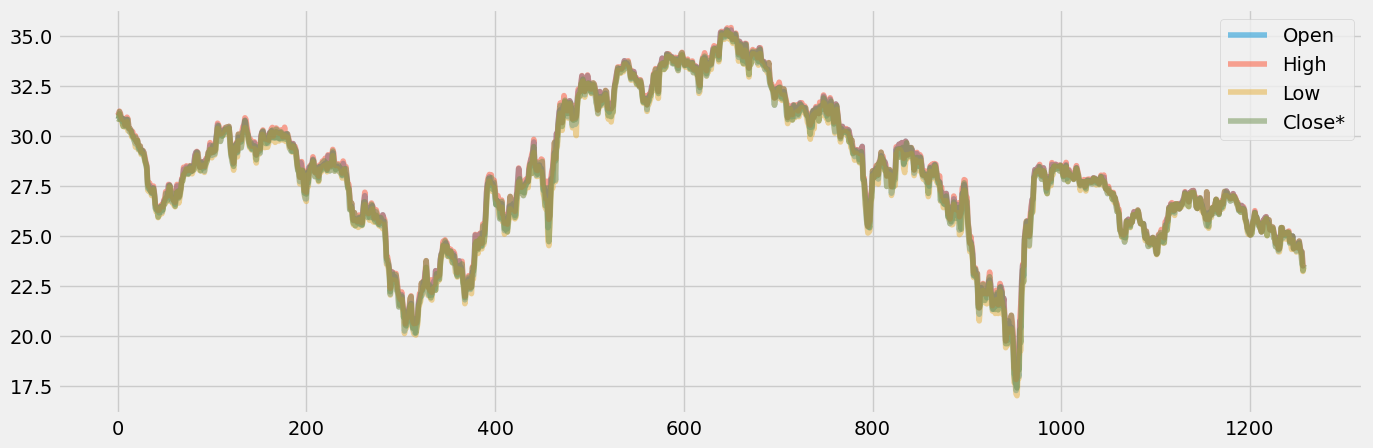

In [13]:
df[['Open','High','Low','Close*']].plot(figsize = (15, 5), alpha = 0.5)


# Evaluating Stationarity:


<Axes: >

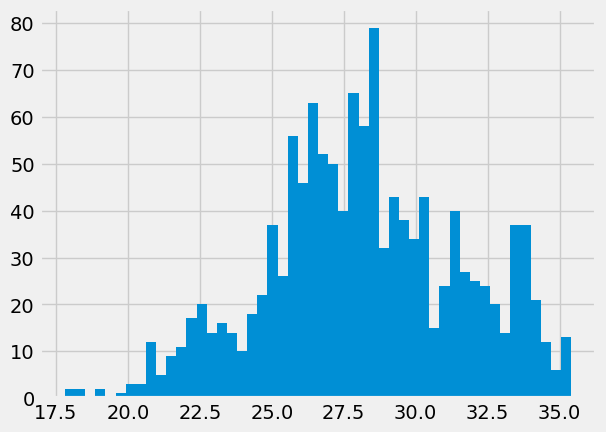

In [14]:
df.High.hist(bins=50)


In [15]:
np.round(df.shape[0]/10,0)


126.0

In [16]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(0,10):
    mean.append(df['High'].iloc[(i*126):(i*126)+126].mean())
    std.append(stdev(df['High'].iloc[(i*126):(i*126)+126]))

In [17]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,28.789286,1.380012
1,29.087302,1.051608
2,23.638810,1.736668
3,28.567222,2.451026
4,33.034286,0.802734
5,32.959683,1.499353
6,28.728889,1.269031
7,24.774762,3.106565
8,26.509762,1.155436
9,25.874274,0.911789


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose


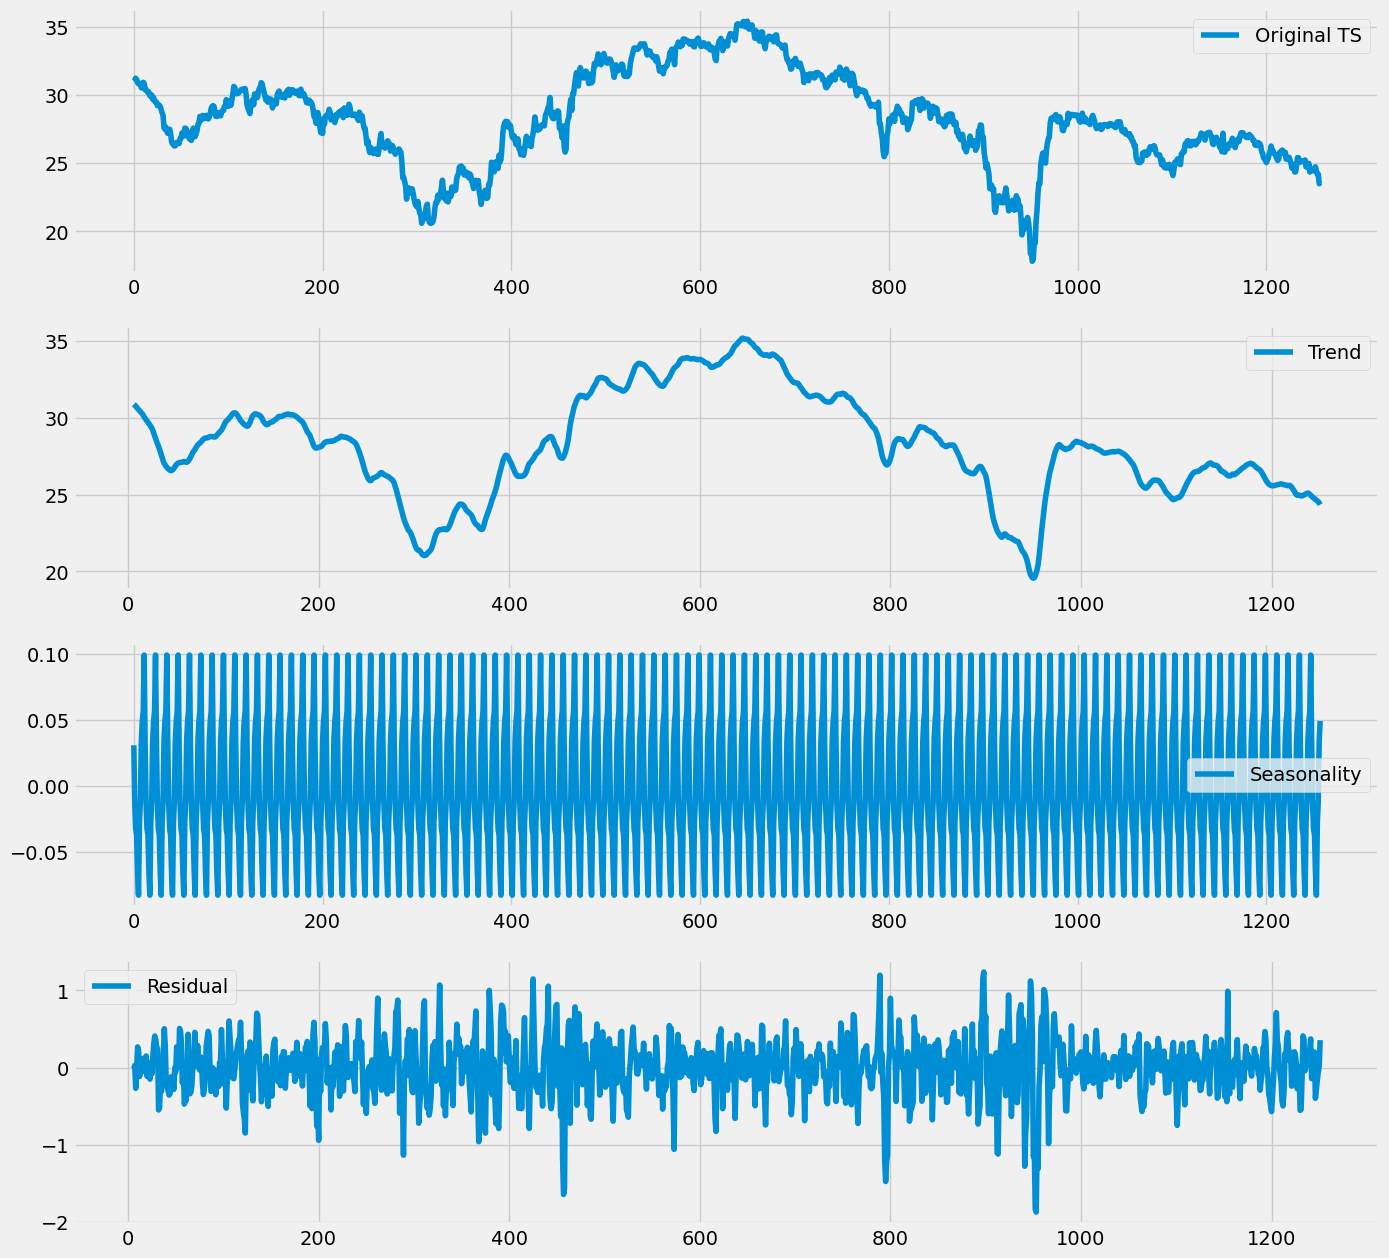

In [19]:
decompose_add=seasonal_decompose(df['High'], model='additive', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

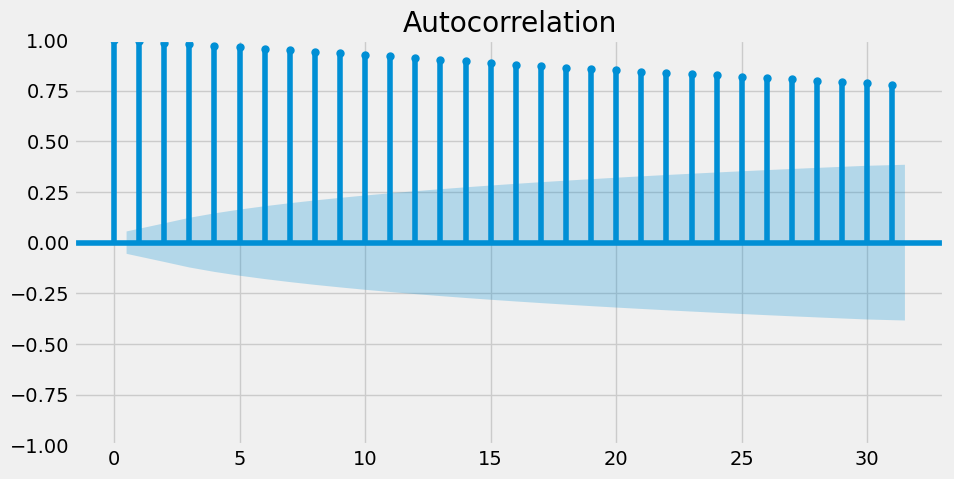

In [21]:
plt.rc("figure", figsize=(10,5))
plot_acf(df['High'])
print()

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


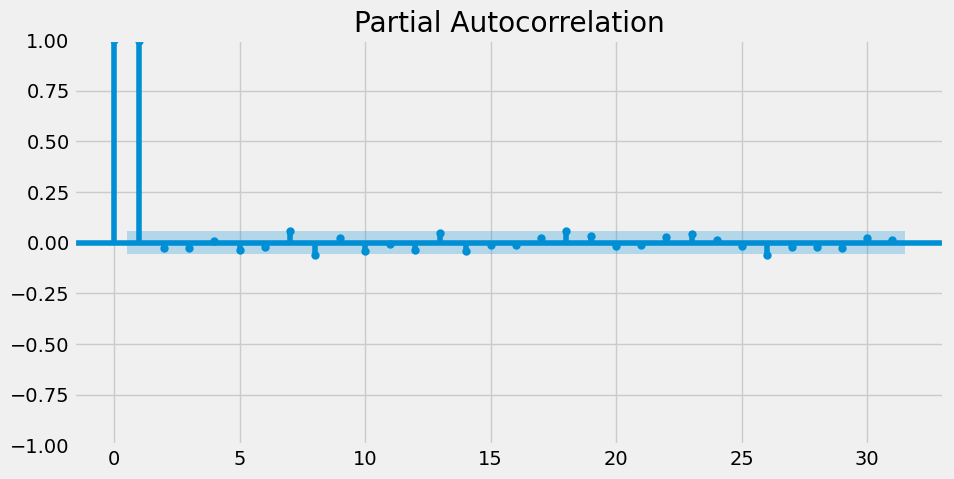

In [22]:
plt.rc("figure", figsize=(10,5))
plot_pacf(df['High'])
print()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
result = adfuller(df['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.960360
p-value: 0.304220
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [25]:
from numpy import log

result = adfuller(log(df['High']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.100257
p-value: 0.244411
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


# Modeling:

In [26]:
new_df=df['High'].iloc[:-4]

In [27]:
train_len = math.ceil(len(new_df)*0.8)
train_len

1004

In [28]:
window=10

In [29]:
train_data = new_df[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

In [30]:
X_train, Y_train= np.array(X_train), np.array(Y_train)

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(994, 10, 1)

In [32]:
X_train

array([[[31.  ],
        [31.07],
        [31.22],
        ...,
        [30.83],
        [30.51],
        [30.69]],

       [[31.07],
        [31.22],
        [31.12],
        ...,
        [30.51],
        [30.69],
        [30.92]],

       [[31.22],
        [31.12],
        [30.9 ],
        ...,
        [30.69],
        [30.92],
        [30.84]],

       ...,

       [[28.28],
        [28.47],
        [28.51],
        ...,
        [28.53],
        [28.52],
        [28.51]],

       [[28.47],
        [28.51],
        [28.57],
        ...,
        [28.52],
        [28.51],
        [28.26]],

       [[28.51],
        [28.57],
        [28.49],
        ...,
        [28.51],
        [28.26],
        [28.07]]])

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [34]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,701 (45.71 KB)

 Trainable params: 11,701 (45.71 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

KeyError: 10

In [ ]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [ ]:
X_val.shape, Y_val.shape

In [ ]:
prediction = model.predict(X_val)

In [ ]:
len(prediction), len(Y_val)


In [ ]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

In [ ]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [ ]:
train = new_df[:train_len]
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

# 1st comparison:


In [ ]:
train_error=[]
val_error=[]

window_number=[5,8,10,15,20,30,40]
for i in window_number:
    #_____________________________________________________________________
    train_data = new_df[0:train_len]

    X_train=[]
    Y_train=[]

    for i in range(window, len(train_data)):
        X_train.append(train_data[i-window:i])
        Y_train.append(train_data[i])

    X_train, Y_train= np.array(X_train), np.array(Y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    #______________________________________________________________________
    test_data = new_df[train_len-window:]

    X_val=[]
    Y_val=[] 

    for i in range(window, len(test_data)):
        X_val.append(test_data[i-window:i])
        Y_val.append(test_data[i])

    X_val, Y_val = np.array(X_val), np.array(Y_val)
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
    #______________________________________________________________________
    model=Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
    #______________________________________________________________________
    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    train_error.append(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
    val_error.append(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

In [ ]:
train_error

In [ ]:
val_error

In [ ]:
pd.concat([pd.DataFrame(train_error,columns=['train_error']),
           pd.DataFrame(val_error,columns=['val_error']),
           pd.DataFrame([5,8,10,15,20,30,40],columns=['window'])], axis=1).set_index('window')

# 2nd comparison:

In [ ]:
window=10

train_data = new_df[0:train_len]
X_train=[]
Y_train=[]
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

X_train, Y_train= np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#____________________________________________________________________
test_data = new_df[train_len-window:]
X_val=[]
Y_val=[] 
for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])
    
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1)
model.summary()
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

In [ ]:
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

In [ ]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [ ]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

In [ ]:
r1, statistics.mean(r1), statistics.stdev(r1)

In [ ]:
r2, statistics.mean(r2), statistics.stdev(r2)

In [ ]:
We can see how validation errors are higher than training and also more spreaded because of such stardard deviation.



# 3rd comparison:

In [ ]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1),recurrent_dropout=0.2))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

In [ ]:
r1, statistics.mean(r1), statistics.stdev(r1)


In [ ]:
r2, statistics.mean(r2), statistics.stdev(r2)


# 4th comparison:

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
r1=[]
r2=[]
for i in range(0,10):
    model=Sequential()
    model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

In [ ]:
r1, statistics.mean(r1), statistics.stdev(r1)

In [ ]:
r2, statistics.mean(r2), statistics.stdev(r2)

In [ ]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [ ]:
import tensorflow 

r1=[]
r2=[]

model=Sequential()
model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
lr_schedule = tensorflow.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 85))
opt1=Adam(learning_rate=1e-5,beta_1=0.9,beta_2=0.7)
model.compile(loss='mean_squared_error', optimizer=opt1)
history=model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=2, callbacks=[lr_schedule])

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
r_train_new=np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2)
r_val_new=np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2)

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 5e-4, 0, 1000])

In [ ]:
r1, statistics.mean(r1), statistics.stdev(r1)


In [ ]:
r2, statistics.mean(r2), statistics.stdev(r2)


In [ ]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

# Predicting 'future' values:


In [ ]:
last_10_days=new_df[-10:].values
X_test=[]
X_test.append(last_10_days)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
print(pred_price)

In [ ]:
df['High'].iloc[-4]

In [ ]:
df['High'].iloc[-4]-pred_price

In [ ]:
df.High.tail(14)

In [ ]:
last_9_days=new_df[-9:].values
X_test=[]
X_test=np.append(last_9_days,pred_price)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price2=model.predict(X_test)
print(pred_price2)

In [ ]:
df['High'].iloc[-3]

In [ ]:
df['High'].iloc[-3]-pred_price2

In [ ]:
last_8_days=new_df[-8:].values
X_test=[]
X_test=np.append(last_8_days,pred_price)
X_test=np.append(X_test,pred_price2)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price3=model.predict(X_test)
print(pred_price3)

In [ ]:
df['High'].iloc[-2]


In [ ]:
df['High'].iloc[-2]-pred_price3

In [ ]:
last_7_days=new_df[-7:].values
X_test=[]
X_test=np.append(last_7_days, pred_price)
X_test=np.append(X_test, pred_price2)
X_test=np.append(X_test, pred_price3)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price4=model.predict(X_test)
print(pred_price4)

In [ ]:
df['High'].iloc[-1]


In [ ]:
df['High'].iloc[-1]-pred_price4
